In [9]:
import re
from tqdm import tqdm_notebook # Removed extra space
from nltk.corpus import stopwords
from tensorflow.keras import regularizers, initializers, optimizers, callbacks
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model

In [10]:
MAX_NB_WORDS = 10000
 # max no. of words for tokenizer
MAX_SEQUENCE_LENGTH = 200 # max length of each entry (sentence), including␣
VALIDATION_SPLIT = 0.2 # data for validation (not used in training)
EMBEDDING_DIM = 100

In [11]:
from google.colab import files
uploaded = files.upload()

Saving Test.csv to Test (1).csv


In [12]:
from google.colab import files
uploaded = files.upload()

Saving Train.csv to Train (1).csv


In [13]:
import pandas as pd
train = pd.read_csv('Train.csv')
train

,id,Technology,Experience,Eligible,Not_Eligible
0,1,"Python,R,Deep Learning,Machine Learning",5,1,0
1,2,"Python,R,Deep Learning,Machine Learning",1,1,0
2,3,"Python,R,Data Analysis,Probability Theory",1,1,0
3,4,"Python,R,Data Analysis,Probability Theory",1,1,0
4,5,"Python,R,Data Analysis,Probability Theory",1,1,0
...,...,...,...,...,...
474,475,"R, Hadoop",5,1,0
475,476,"R, Spark",5,1,0
476,477,"JavaScript,HTML/CSS,Frontend Development,Data ...",4,1,0
477,478,"Java,SQL,Web Development,Database Administration",4,1,0


In [14]:
import pandas as pd
test = pd.read_csv('Test.csv')
test

,id,Technology,Experience,Eligible,Not_Eligible
0,480,"Python,TensorFlow,Deep Learning,Data Visualiza...",1,1,0
1,481,"TensorFlow,R,Data Engineering,Deep Learning",5,1,0
2,482,"TensorFlow,R,Data Engineering,Deep Learning",5,1,0
3,483,"Java,C++,Digital Logic,FPGA",1,1,0
4,484,"Swift,Java,Cloud Computing,Data Management",5,1,0
...,...,...,...,...,...
114,594,"SAS, SAS Viya",3,1,0
115,595,"SAS, SQL",3,1,0
116,596,"SAS, SAS Viya",3,1,0
117,597,"C++,ROS,Gazebo,Computer Vision",6,1,0


In [15]:
train.head()

,id,Technology,Experience,Eligible,Not_Eligible
0,1,"Python,R,Deep Learning,Machine Learning",5,1,0
1,2,"Python,R,Deep Learning,Machine Learning",1,1,0
2,3,"Python,R,Data Analysis,Probability Theory",1,1,0
3,4,"Python,R,Data Analysis,Probability Theory",1,1,0
4,5,"Python,R,Data Analysis,Probability Theory",1,1,0


In [16]:
train.isnull().sum()

id              0
Technology      0
Experience      0
Eligible        0
Not_Eligible    0
dtype: int64

In [17]:
test.isnull().sum()

id              0
Technology      0
Experience      0
Eligible        0
Not_Eligible    0
dtype: int64

In [18]:
labels = ['Experience', 'Eligible', 'Not_Eligible']
y = train[labels].values
Technology_train = train['Technology']
Technology_test = test['Technology']

In [19]:
Technology_train = list(Technology_train)

In [20]:
import nltk
nltk.download('popular')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

True

In [21]:
!pip install --upgrade tqdm

In [22]:
from tqdm.notebook import tqdm # Import tqdm.notebook

def clean_text(text, remove_stopwords = True):
    output = ""
    text = str(text).replace("\n", "")
    text = re.sub(r'[^\w\s]','',text).lower()
    if remove_stopwords:
        text = text.split(" ")
        for word in text:
            if word not in stopwords.words("english"):
                output = output + " " + word
    else:
      output = text
    return str(output.strip())[1:-3].replace(" ", " ")

texts = []

# Use tqdm.notebook.tqdm
for line in tqdm(Technology_train, total=159571):
    texts.append(clean_text(line))

  0%|          | 0/159571 [00:00<?, ?it/s]

In [23]:
print('Sample data:', texts[1], y[1])

Sample data: ythonrdeep learningmachine learn [1 1 0]


In [24]:
tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
tokenizer.fit_on_texts(texts)

In [25]:
sequences = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index
print('Vocabulary size:', len(word_index))

Vocabulary size: 227


In [26]:
data = pad_sequences(sequences, padding = 'post', maxlen = MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', y.shape)

Shape of data tensor: (479, 200)
Shape of label tensor: (479, 3)


In [27]:
import numpy as np
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = y[indices]

In [28]:
num_validation_samples = int(VALIDATION_SPLIT*data.shape[0])
x_train = data[:-num_validation_samples]
y_train = labels[:-num_validation_samples]
x_val = data[-num_validation_samples: ]
y_val = labels[-num_validation_samples: ]

In [29]:
print('Number of entries in each category:')
print('training: ', y_train.sum(axis=0))
print('validation: ', y_val.sum(axis=0))

Number of entries in each category:
training:  [696 256 128]
validation:  [189  68  27]


In [30]:
print('Tokenized sentences: \n', data[10])
print('One hot label: \n', labels[10])

Tokenized sentences: 
 [36 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0]
One hot label: 
 [2 1 0]


In [31]:
EMBEDDING_DIM = 100
GLOVE_DIR = "/content/glove.6B." + str(EMBEDDING_DIM) + "d.txt" # Fixed the typo here

embeddings_index = {}
f = open(GLOVE_DIR,'rb')
print('Loading GloVe from:', GLOVE_DIR,'...', end='')
for line in f:
  values = line.split()
  word = values[0]
  embeddings_index[word] = np.asarray(values[1:], dtype='float32')
f.close()
print("Done.\n Proceeding with Embedding Matrix...", end="")
embedding_matrix = np.random.random((len(word_index) + 1, EMBEDDING_DIM))
for word, i in word_index.items():
  embedding_vector = embeddings_index.get(word)
  if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector
print(" Completed!")


Loading GloVe from: /content/glove.6B.100d.txt ...Done.
 Proceeding with Embedding Matrix... Completed!


In [32]:
#weight = "/Users/ssmie/Downloads/my_model_weights_discriminator.h5"
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedding_layer = Embedding(len(word_index) + 1,
                            EMBEDDING_DIM,
                            weights = [embedding_matrix],
                            input_length = MAX_SEQUENCE_LENGTH,
                            trainable=False,
                            name = 'embeddings')
embedded_sequences = embedding_layer(sequence_input)

In [33]:
x = LSTM(60, return_sequences=True,name='lstm_layer')(embedded_sequences)
x = GlobalMaxPool1D()(x)
x = Dropout(0.1)(x)
x = Dense(50, activation="relu")(x)
x = Dropout(0.1)(x)
preds = Dense(3, activation="sigmoid")(x)

In [34]:
model = Model(sequence_input, preds)
model.compile(loss = 'binary_crossentropy',
              optimizer='adam',
              metrics = ['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200)]             0         
                                                                 
 embeddings (Embedding)      (None, 200, 100)          22800     
                                                                 
 lstm_layer (LSTM)           (None, 200, 60)           38640     
                                                                 
 global_max_pooling1d (Glob  (None, 60)                0         
 alMaxPooling1D)                                                 
                                                                 
 dropout (Dropout)           (None, 60)                0         
                                                                 
 dense (Dense)               (None, 50)                3050      
                                                             

In [35]:
print('Training progress:')
history = model.fit(x_train, y_train, epochs = 5, batch_size=32,validation_data=(x_val, y_val))

Training progress:
Epoch 1/5
12/12 [==============================] - 9s 386ms/step - loss: 0.2360 - accuracy: 0.6432 - val_loss: -0.3516 - val_accuracy: 0.7158
Epoch 2/5
12/12 [==============================] - 3s 215ms/step - loss: -0.5926 - accuracy: 0.6667 - val_loss: -1.4599 - val_accuracy: 0.7158
Epoch 3/5
12/12 [==============================] - 4s 353ms/step - loss: -1.5842 - accuracy: 0.6667 - val_loss: -2.8937 - val_accuracy: 0.7158
Epoch 4/5
12/12 [==============================] - 2s 206ms/step - loss: -2.9319 - accuracy: 0.6667 - val_loss: -4.7821 - val_accuracy: 0.7158
Epoch 5/5
12/12 [==============================] - 2s 209ms/step - loss: -4.5031 - accuracy: 0.6667 - val_loss: -7.0823 - val_accuracy: 0.7158


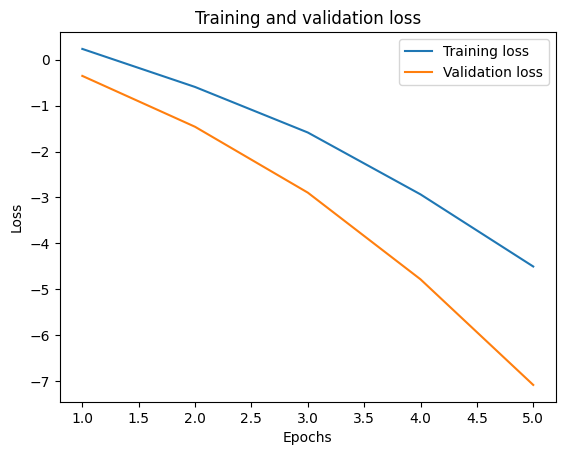

In [36]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show();

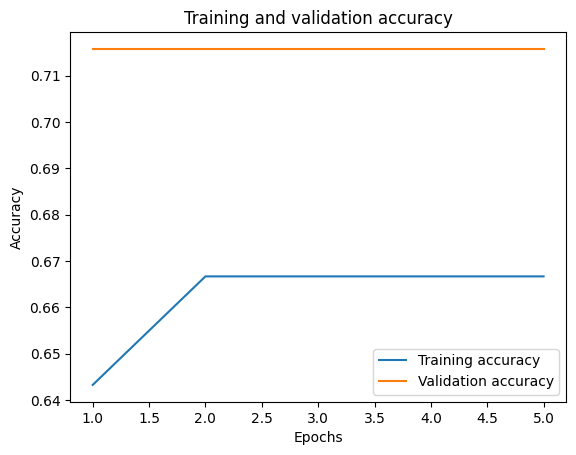

In [37]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
plt.plot(epochs, accuracy, label='Training accuracy')
plt.plot(epochs, val_accuracy, label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show();

3/3 [==============================] - 2s 60ms/step
y_val shape: (95, 3)
y_pred_proba shape: (95, 3)


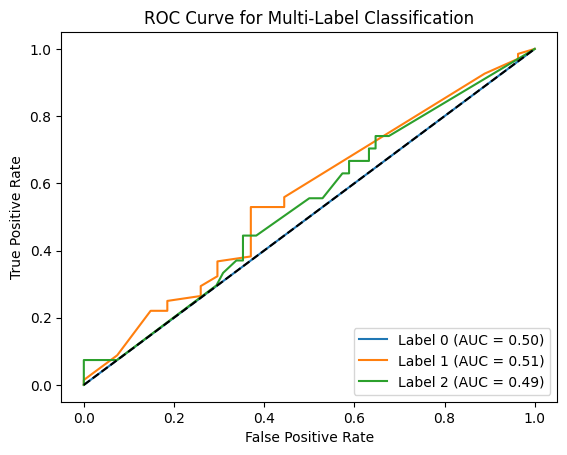

In [38]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Predict probabilities for the validation set
y_pred_proba = model.predict(x_val)

# Check shapes of y_val and y_pred_proba
print(f'y_val shape: {y_val.shape}')
print(f'y_pred_proba shape: {y_pred_proba.shape}')

# Ensure y_val is one-hot encoded and y_pred_proba has the correct shape
if y_val.shape[1] != y_pred_proba.shape[1]:
    print("Mismatch in number of labels between y_val and y_pred_proba")
else:
    plt.figure()
    for i in range(y_val.shape[1]):
        fpr, tpr, _ = roc_curve(y_val[:, i], y_pred_proba[:, i], pos_label=1)
        roc_auc = auc(fpr, tpr)

        # Filter out points where TPR < FPR (below the diagonal line)
        mask = tpr >= fpr
        fpr_filtered = fpr[mask]
        tpr_filtered = tpr[mask]

        plt.plot(fpr_filtered, tpr_filtered, label='Label %d (AUC = %0.2f)' % (i, roc_auc))

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for Multi-Label Classification')
    plt.legend(loc="lower right")
    plt.show()

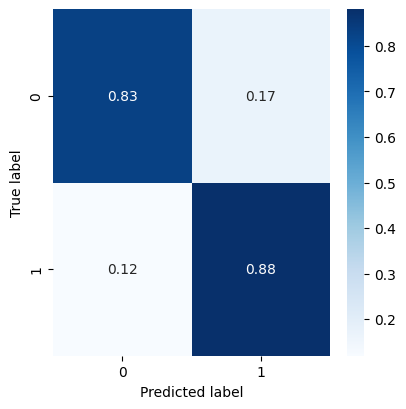

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Assuming 'cm' is your confusion matrix, replace with your actual confusion matrix
cm = np.array([[100, 20], [10, 70]])

# Normalize the confusion matrix
cm_norm = np.around(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], decimals=2)

# Create a DataFrame for better visualization with Seaborn
cm_df = pd.DataFrame(cm_norm, index=[0, 1], columns=[0, 1])

# Plot the heatmap
figure = plt.figure(figsize=(4, 4))
sns.heatmap(cm_df, annot=True, cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()